In [89]:
    # 1 Data manipulation
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas_datareader as pdr 
from pandas_datareader import data
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')
 
import yfinance as yf
from yahoofinancials import YahooFinancials
import requests

import locale
from datetime import date, datetime
import os
import time
import csv
import json
from patsy import dmatrices

print('done')

done


In [91]:
'''

Stock Portfolio Comparison / EDA

''';

In [92]:
start = datetime(2018, 1, 3)
end = datetime.now()

tickers = ["SBUX", "SHOP", "BIDU", "WDAY","WIX",]

stock_data = data.DataReader(
    tickers, 'yahoo', start, end)['Adj Close']
    
stock_data.head()

Symbols,SBUX,SHOP,BIDU,WDAY,WIX
Date,,,,,
2018-01-03,55.184090,107.750000,245.550003,105.169998,58.299999
2018-01-04,55.390881,109.949997,245.729996,109.250000,62.099998
2018-01-05,56.030048,110.580002,245.139999,109.320000,60.650002
2018-01-08,55.748062,112.349998,250.820007,109.940002,61.049999
2018-01-09,55.625870,110.730003,254.729996,109.699997,61.150002


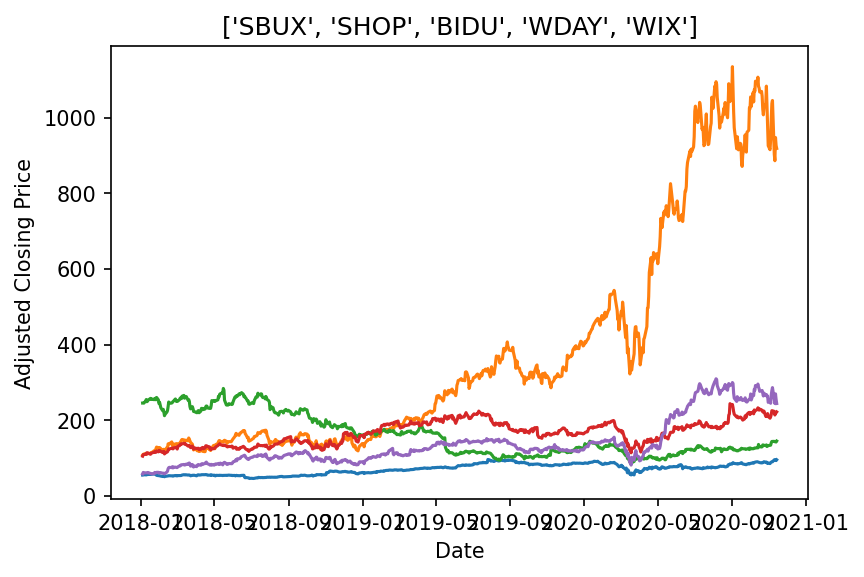

In [93]:
lst = list(stock_data.columns)
stock_data_closing_prices = stock_data

fig = plt.subplots(dpi = 150)

plt.plot(stock_data_closing_prices)

plt.xlabel("Date")
h = plt.ylabel("Adjusted Closing Price")
plt.title(lst)
plt.show();

Symbols,SBUX,SHOP,BIDU,WDAY,WIX
Symbols,,,,,
SBUX,1.000000,0.589837,-0.841037,0.792014,0.573899
SHOP,0.589837,1.000000,-0.585625,0.587158,0.956459
BIDU,-0.841037,-0.585625,1.000000,-0.650450,-0.532298
WDAY,0.792014,0.587158,-0.650450,1.000000,0.690103
WIX,0.573899,0.956459,-0.532298,0.690103,1.000000


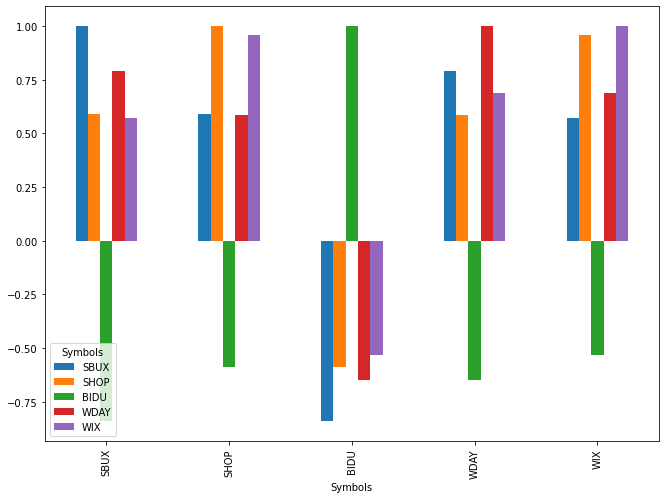

In [111]:
stock_data.corr().plot(kind = 'bar', figsize = (11, 8))
stock_data.corr()

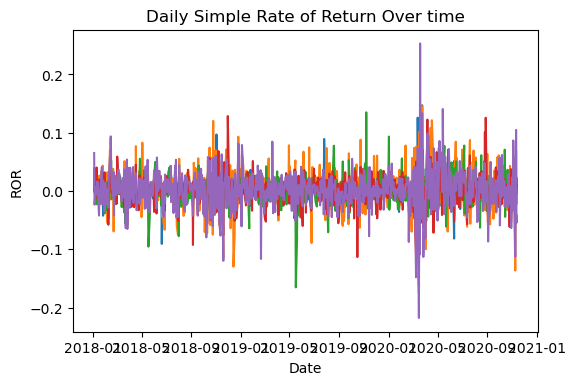

In [112]:
stock_data_daily_returns = stock_data.pct_change()

fig = plt.subplots(dpi = 100)

plt.plot(stock_data_daily_returns[1:])
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.show();

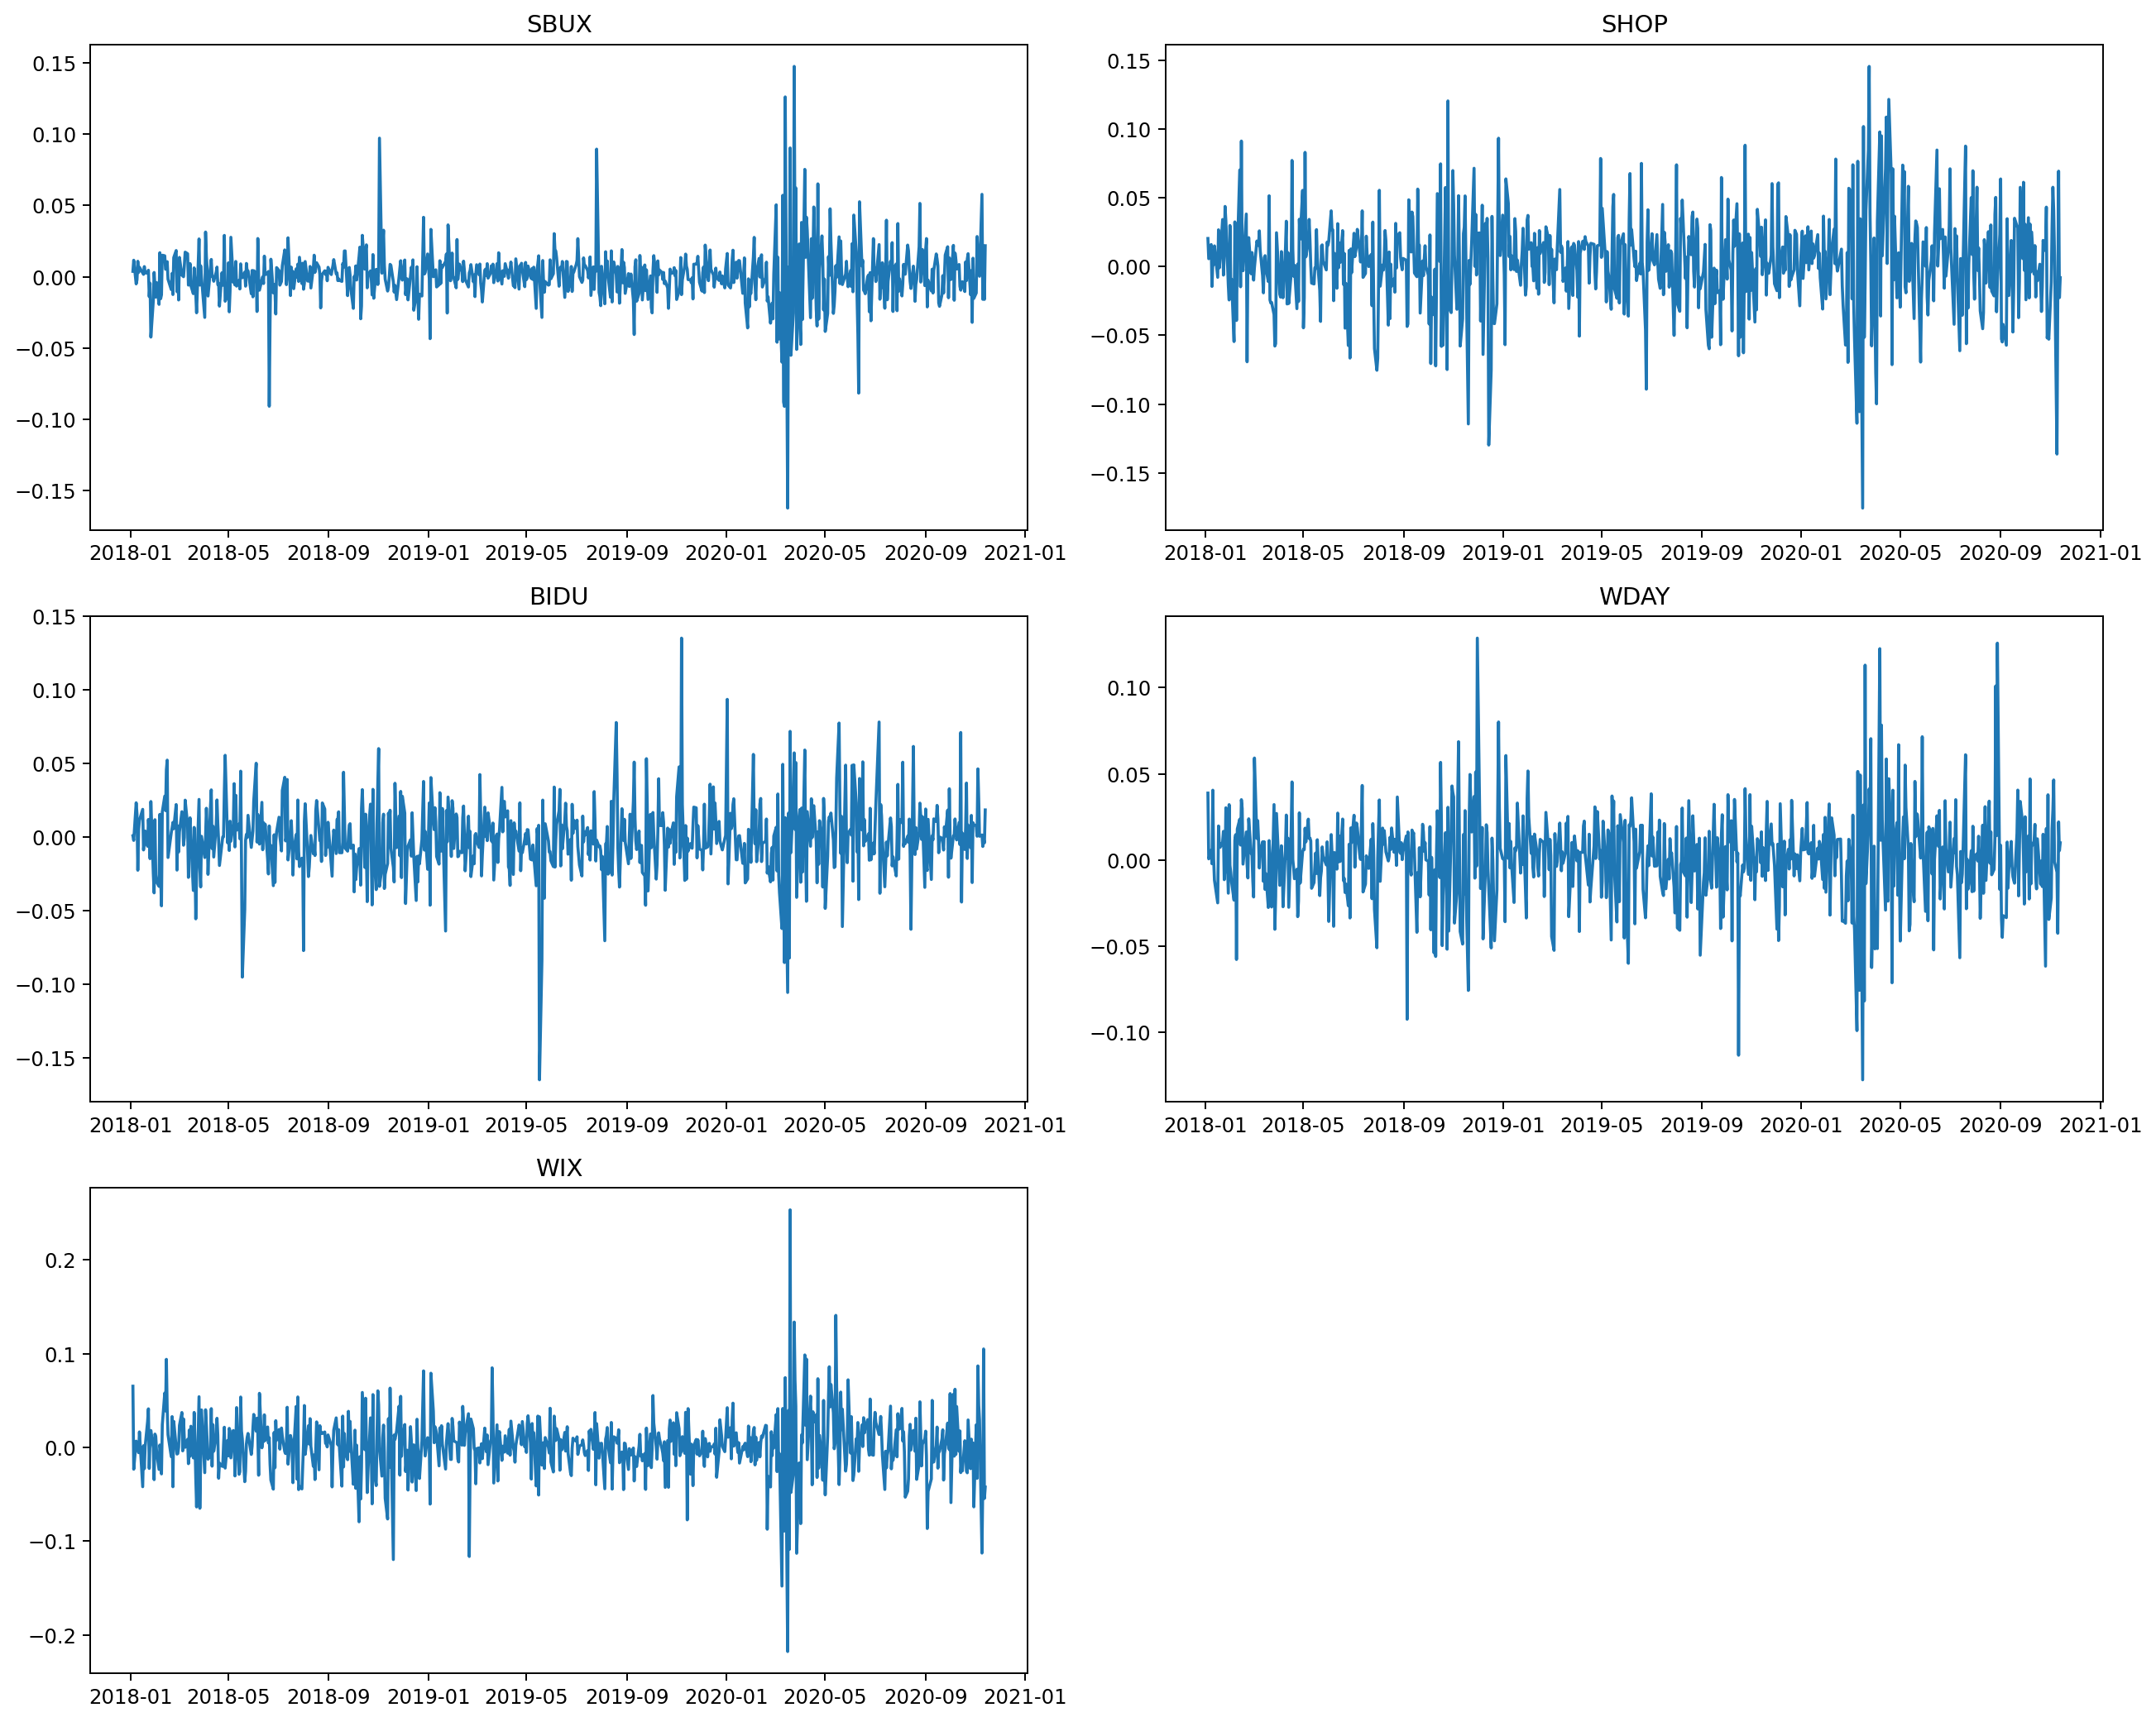

In [115]:
fig = plt.figure(figsize = (15,12), dpi = 175)

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

ax1.plot(stock_data['SBUX'].pct_change())
ax1.set_title("SBUX")
ax2.plot(stock_data['SHOP'].pct_change())
ax2.set_title("SHOP")
ax3.plot(stock_data['BIDU'].pct_change())
ax3.set_title("BIDU")
ax4.plot(stock_data['WDAY'].pct_change())
ax4.set_title("WDAY")
ax5.plot(stock_data['WIX'].pct_change())
ax5.set_title("WIX")
plt.tight_layout()
plt.show()

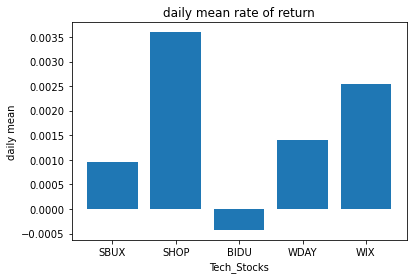

,daily_mean
Symbols,
SBUX,0.000964
SHOP,0.003593
BIDU,-0.000426
WDAY,0.001396
WIX,0.002541


In [116]:
# calculate daily mean
daily_mean = stock_data_daily_returns.mean()
daily_mean1 = pd.DataFrame()
daily_mean1['daily_mean'] = daily_mean
    # daily mean index for the x axis
daily_mean.keys()
    # grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])

# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
    # plot bars
plt.bar(x_pos, height)
    # create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())
    # label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return")
    # show graphic
plt.show();
daily_mean1

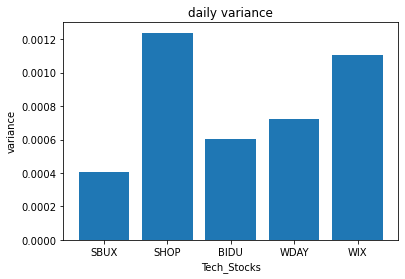

,daily_var
Symbols,
SBUX,0.000406
SHOP,0.001239
BIDU,0.000601
WDAY,0.000721
WIX,0.001109


In [117]:
# calculate variance
daily_var = stock_data_daily_returns.var()
daily_var1 = pd.DataFrame()
daily_var1['daily_var'] = daily_var

# variance index for the x axis
daily_var.keys()
    # grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])

# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
    
    # plot bars
plt.bar(x_pos, height)
    # create names on the x-axis
plt.xticks(x_pos, daily_var.keys())
    # label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")
    # show graphic
plt.show();
daily_var1

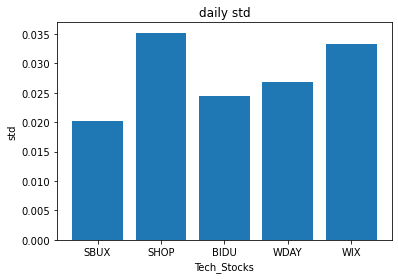

,daily_std
Symbols,
SBUX,0.020145
SHOP,0.035197
BIDU,0.024512
WDAY,0.026859
WIX,0.033296


In [118]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()
daily_std1 = pd.DataFrame()
daily_std1['daily_std'] = daily_std

# standard deviation index for the x axis
daily_var.keys()

# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
    
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))
    # plot bars
plt.bar(x_pos, height)
    # create names on the x-axis
plt.xticks(x_pos, daily_std.keys())
    # label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")
    # show graphic
plt.show();
daily_std1

Symbols,SBUX,SHOP,BIDU,WDAY,WIX
Symbols,,,,,
SBUX,1.000000,0.362358,0.384507,0.468552,0.457339
SHOP,0.362358,1.000000,0.360953,0.582404,0.617235
BIDU,0.384507,0.360953,1.000000,0.421865,0.407386
WDAY,0.468552,0.582404,0.421865,1.000000,0.628949
WIX,0.457339,0.617235,0.407386,0.628949,1.000000


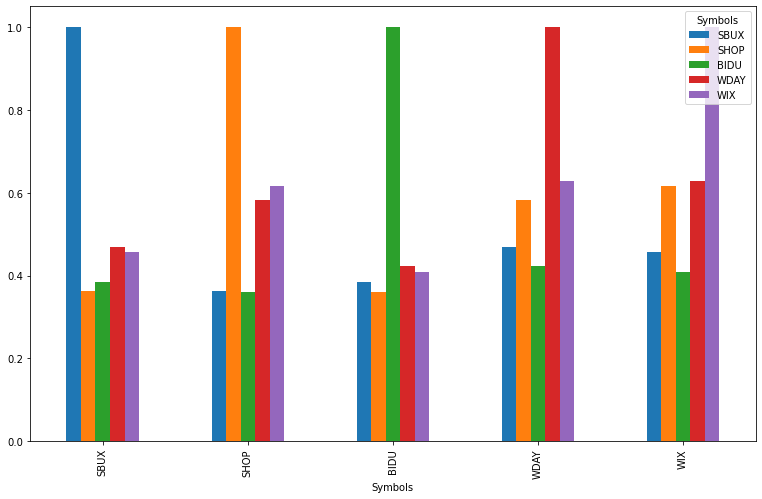

In [119]:
stock_data_daily_returns.corr().plot(kind = 'bar', figsize = (13,8))

stock_data_daily_returns.corr()